In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
X_train = pd.read_csv('./Logistic_X_Train.csv')
Y_train = pd.read_csv('./Logistic_Y_Train.csv')
X_test = pd.read_csv('./Logistic_X_Test.csv')

X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)

print(X_train.shape,Y_train.shape)
print(X_test.shape)


(3000, 3) (3000, 1)
(1000, 3)


In [4]:
u = np.mean(X_train,axis=0)
std = np.std(X_train,axis=0)

X_train = (X_train-u)/std
X_test = (X_test-u)/std

In [5]:
ones = np.ones((X_train.shape[0],1))
x = np.hstack((ones,X_train))
print(x.shape)

(3000, 4)


In [6]:
ones = np.ones((X_test.shape[0],1))
x_ = np.hstack((ones,X_test))
print(x_.shape)

(1000, 4)


In [17]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def hypothesis(W,X):
    return sigmoid(np.dot(X,W))

def loss(X,Y,W):
    m = X.shape[0]
    y_ = hypothesis(W,X)
    l = -1*np.mean(Y*np.log(y_) + (1-Y)*np.log(1-y_))

    return l

def gradient(X,Y,W):
    m = X.shape[0]
    y_ = hypothesis(W,X)
    grad = np.dot(X.T,(y_-Y))

    return grad/m

def gradient_descent(X,Y,lr=0.1,max_itr=1000):
    m,n = X.shape

    W = np.zeros((X.shape[1],))
    error = []

    for i in range(max_itr):
        e = loss(X,Y,W)
        grad = gradient(X,Y,W)
        W = W - lr*grad
        error.append(e)
    
    return error,W

In [18]:
Y_train = Y_train.reshape((-1,))
error,weights = gradient_descent(x,Y_train)

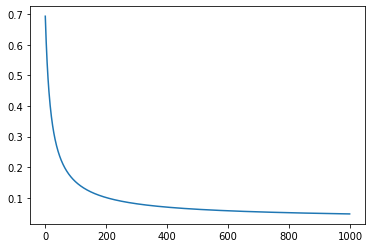

In [19]:
plt.plot(error)
plt.show()

In [20]:
def predict(X,W):
    y_ = hypothesis(W,X)
    output = np.zeros((X.shape[0],))

    output[y_>=0.5] = 1

    return output

In [22]:
y_pred = predict(x_,weights)
print(y_pred[:10])

[1. 1. 0. 1. 1. 1. 0. 1. 0. 0.]
